# Exam for Machine Learning Python Lab
## 07/02/2022
## Napolitano Daniele 
---

### 1. Load the dataset1.csv and explore the data, showing size, structure and histograms of numeric data; show the histogram of the frequencies of the class labels, contained in the “y” column

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import silhouette_score, silhouette_samples
from mpl_toolkits import mplot3d
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

random_state = 42

In [3]:
#load dataset 
df = pd.read_csv('exam_superv.csv')
print(df.shape)
df.head()

(1200, 4)


,0,1,y,2
0,1.589942,2.977770,0,1.953805
1,2.908437,1.837522,1,1.510049
2,3.284091,1.818476,1,3.307287
3,3.148717,2.071991,1,3.452021
4,2.116881,2.133874,0,2.157870


In [4]:
#show structure of numeric data
df.drop(['y'], axis=1).describe()

,0,1,2
count,1200.000000,1200.000000,1200.000000
mean,2.391668,1.996186,2.494236
std,0.804770,0.507227,0.589235
min,0.343023,0.509424,1.500260
25%,1.806657,1.809635,1.974389
50%,2.744439,1.983524,2.469778
75%,3.092275,2.201484,2.995198
max,3.529782,3.647299,3.498523


array([[<AxesSubplot: title={'center': '0'}>,
        <AxesSubplot: title={'center': '1'}>],
       [<AxesSubplot: title={'center': '2'}>, <AxesSubplot: >]],
      dtype=object)

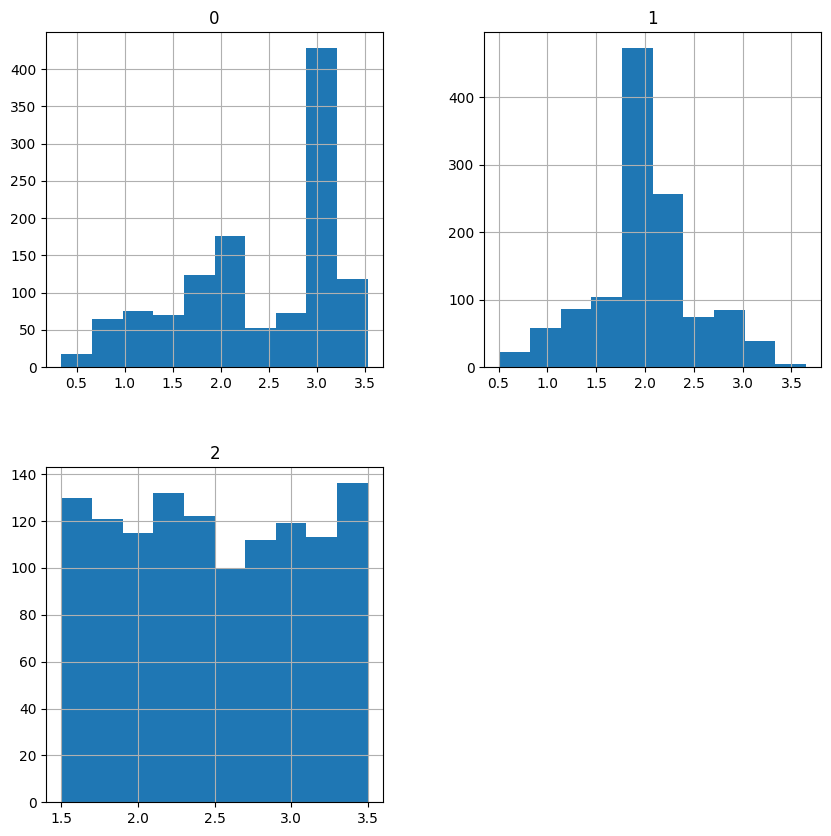

In [5]:
#show histogram of numeric data
df.drop(['y'], axis=1).hist(figsize=(10,10))

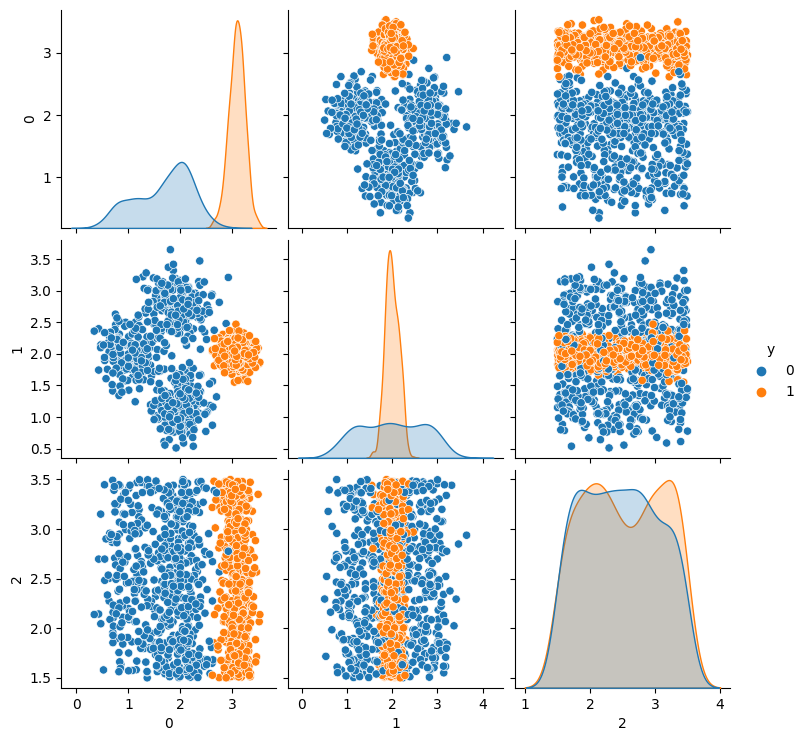

In [6]:
sns.pairplot(df, hue='y')

(array([591.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 609.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

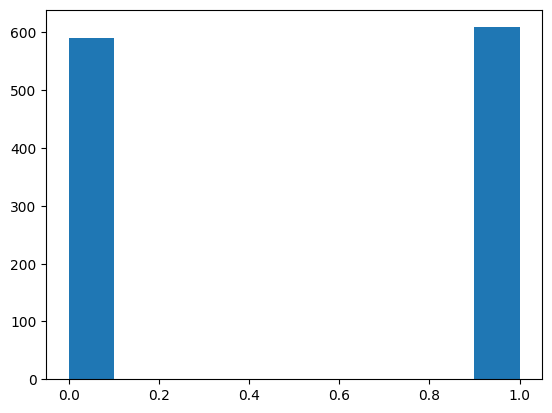

In [7]:
#show histogram of the frequencies of the clas labels,contained in the y column
plt.hist(df['y'])

---
### 2. drop the column “y” and find the best clustering scheme and hyper–parameters able to reproduce the y column (hint: before clustering you can consider dropping columns with little correlation to “y”; perhaps you should consider more than one estimator for clustering)

In [8]:
# column with little correlation to y
# Calculate the correlation coefficients between each column and y
correlations = df.corr()['y'].abs()

# Select the column with the smallest absolute correlation coefficient
column_with_least_correlation = correlations.drop('y').idxmin()

print(f"The column with the least correlation to y is {column_with_least_correlation}")

The column with the least correlation to y is 1


In [9]:
#drop column with least correlation
df.drop([column_with_least_correlation], axis=1, inplace=True)


In [11]:
#drop y
y=df["y"]
df=df.drop(['y'], axis=1)


Now, I will find the best clutering scheme and hyperparameters to reproduce the y column. I will use the following clustering algorithms:
- KMeans
- AgglomerativeClustering
- DBSCAN
- GaussianMixture


In [12]:
model_lbls = [
        'kmeans',
        'agg',
        'dbscan',
        'gmm',
]

# Set the parameters for each clustering algorithm
tuned_param_kmeans = [{'n_clusters': [*range(2, 11)]}]
tuned_param_agg = [{'n_clusters': [*range(2, 11)], 'linkage': ['ward', 'complete', 'average']}]
tuned_param_dbscan = [{'eps': [0.1, 0.5, 1, 2], 'min_samples': [*range(2, 11)]}]
tuned_param_gmm = [{'n_components': [*range(2, 11)]}]

# Define the clustering models, with the parameter grids listed above
models = {
    'kmeans': {'name': 'KMeans              ',
               'estimator': KMeans(),
               'param': tuned_param_kmeans,
              },
    'agg': {'name': 'Agglomerative       ',
            'estimator': AgglomerativeClustering(),
            'param': tuned_param_agg,
           },
    'dbscan': {'name': 'DBSCAN              ',
               'estimator': DBSCAN(),
               'param': tuned_param_dbscan,
              },
    'gmm': {'name': 'Gaussian Mixture    ',
            'estimator': GaussianMixture(),
            'param': tuned_param_gmm,
           },
}

results_short = {}

In [20]:
# Set the evaluation metrics for clustering
metrics = {
    'silhouette': silhouette_score,
}

results_short = {}
#remove warning
pd.options.mode.chained_assignment = None  # default='warn'


for metric_name, metric_func in metrics.items():
    print('='*40)
    print("# Tuning hyper-parameters for %s #" % metric_name)
    print()
    for m in models:
        print('-'*40)
        print("Training model {}".format(models[m]['name']))
        clf = GridSearchCV(models[m]['estimator'], models[m]['param'], cv=None,
                           scoring=metric_func, 
                           return_train_score = False,
                           n_jobs = 2, # this allows using multi-cores
                           )

        clf.fit(df)
        if(m=='KMeans' or m=="gmm"):
            y_clf=clf.best_estimator_.predict(df)
        else:
            y_clf = clf.best_estimator_.labels_
    
        #results_short is a matrix which, for each model, stores:
        # - the best value of the metric
        # - the best parameters
        # - the accuracy of the model (using y as gold standard)
        # - the confusion matrix
        results_short[m] = [metric_func(df, y_clf), clf.best_params_,np.mean(y_clf==y), confusion_matrix(y, y_clf)]
        print("best silhouette score:",results_short[m][0])
        print("best accuracy:",results_short[m][2])

# Tuning hyper-parameters for silhouette #

----------------------------------------
Training model KMeans              


C:\Users\gnele\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_search.py:953: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan]
  warnings.warn(


best silhouette score: 0.464300488948055
best accuracy: 0.9641666666666666
----------------------------------------
Training model Agglomerative       


C:\Users\gnele\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_search.py:953: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan]
  warnings.warn(


best silhouette score: 0.45912192534614654
best accuracy: 0.013333333333333334
----------------------------------------
Training model DBSCAN              


C:\Users\gnele\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_search.py:953: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


best silhouette score: -0.3544276585058902
best accuracy: 0.8491666666666666
----------------------------------------
Training model Gaussian Mixture    
best silhouette score: 0.4472680966369664
best accuracy: 0.9875


C:\Users\gnele\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_search.py:953: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan]
  warnings.warn(


In [22]:
for m in results_short.keys():
    print("{}\t - silhouette: {:4.2}% - params:{} - accuracy: {:4.2}%".format(models[m]['name'], results_short[m][0], results_short[m][1], results_short[m][2]))


KMeans              	 - silhouette: 0.46% - params:{'n_clusters': 2} - accuracy: 0.96%
Agglomerative       	 - silhouette: 0.46% - params:{'linkage': 'ward', 'n_clusters': 2} - accuracy: 0.013%
DBSCAN              	 - silhouette: -0.35% - params:{'eps': 0.1, 'min_samples': 2} - accuracy: 0.85%
Gaussian Mixture    	 - silhouette: 0.45% - params:{'n_components': 2} - accuracy: 0.99%


---
### 3. show the difference between the original “y” column and the labels generated by the clustering, it can be expressed as “accuracy”, produce also the confusion matrix

In [23]:
#take the best model based on accuracy
best_model = max(results_short, key=lambda x: results_short[x][2])
best_params = results_short[best_model][1]
best_accuracy = results_short[best_model][2]
print("Best model:",models[best_model]["name"], "with accuracy:",best_accuracy)
#get the confusion matrix
print("confusion matrix:")
print(results_short[best_model][3])


Best model: Gaussian Mixture     with accuracy: 0.9875
confusion matrix:
[[588   3]
 [ 12 597]]


The best estimator turns out to be the **Gaussian Mixture** model, which uses a model based approach:<br>
It is a probabilistic model that assumes that the data is generated from a mixture of several Gaussian distributions with unknown parameters. The goal of Gaussian Mixture is to estimate the parameters of the mixture model, which includes the means, covariances, and mixing coefficients of the Gaussian distributions. 


---
### 4. apply the same transformations, to dataset2.csv, then apply the best clustering scheme and hyper parameters and plot the data with the assigned labels

In [24]:
# load unsupervised dataset
df_unsup = pd.read_csv('exam_unsuperv.csv')
#drop column with least correlation
df_unsup.drop([column_with_least_correlation], axis=1, inplace=True)


In [18]:
#apply best model, which is in models[best_model]["estimator"]
#using the best parameters found in the previous step, which are in best_params
y_unsup= models[best_model]["estimator"].set_params(**best_params).fit_predict(df_unsup)

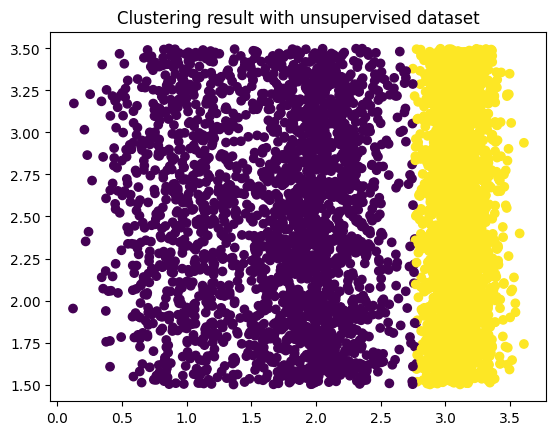

In [19]:
#plot the result
plt.scatter(df_unsup.iloc[:, 0], df_unsup.iloc[:, 1], c=y_unsup)
plt.title("Clustering result with unsupervised dataset")
plt.show()